In [41]:
import numpy as np
import pandas as pd

In [4]:
calories = pd.read_csv('/content/calories.csv')

calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [5]:
exercise = pd.read_csv('/content/exercise.csv')
exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [6]:
# combining both dataframes

calories_data = pd.concat([exercise,calories['Calories']], axis=1)

calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [7]:
# checking the size and dtype

calories_data.shape

(15000, 9)

In [8]:
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [9]:
# cheking for null values

calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [10]:
# descriptive sinfo

calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [11]:
# Removing unwanted columns
# User_ID column is not required

calories_data.drop('User_ID',axis=1,inplace=True)

calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [12]:
# Encoding Gender column

calories_data['Gender'].unique()

array(['male', 'female'], dtype=object)

In [13]:
calories_data['Gender'].value_counts()

female    7553
male      7447
Name: Gender, dtype: int64

In [14]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [15]:
calories_data['Gender'] = le.fit_transform(calories_data['Gender'])

calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


<Axes: xlabel='Age', ylabel='Density'>

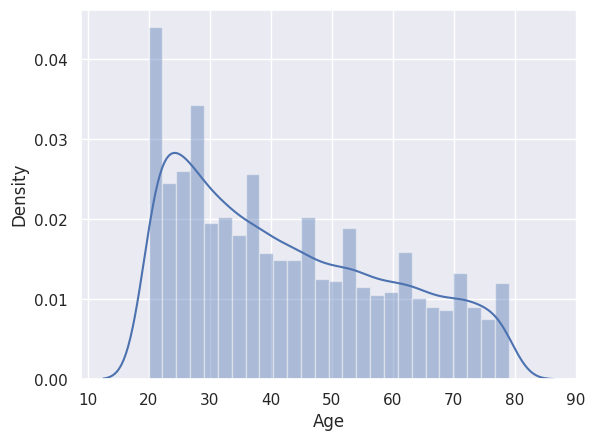

In [16]:
# Visualizing the data

import matplotlib.pyplot as plt
import seaborn as sns

# Age column
sns.set()
sns.distplot(calories_data['Age'])

<Axes: xlabel='Height', ylabel='Density'>

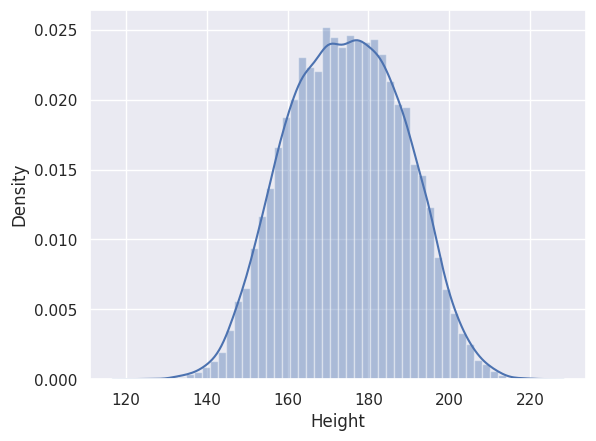

In [17]:
# Height column

sns.distplot(calories_data['Height'])

<Axes: >

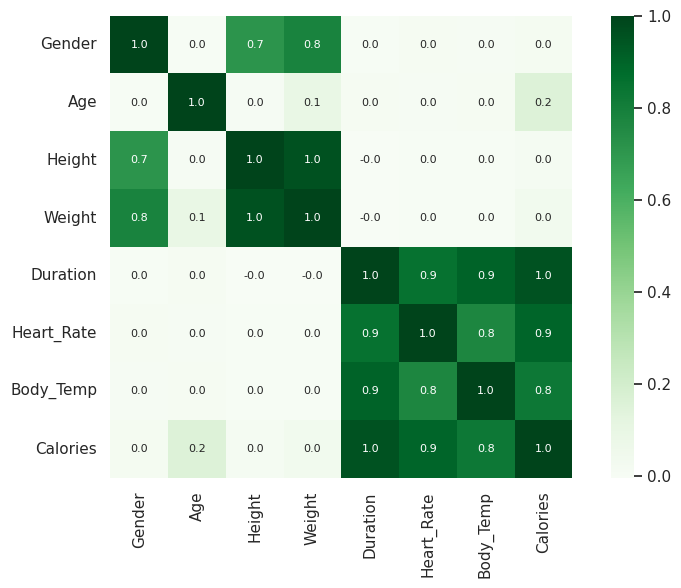

In [18]:
# correlation heatmap

correlation = calories_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Greens')

In [19]:
# MODEL BUILDING

# Seperating Independent and Dependent

x = calories_data.drop('Calories',axis=1)
y = calories_data.Calories

In [20]:
x

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,1,68,190.0,94.0,29.0,105.0,40.8
1,0,20,166.0,60.0,14.0,94.0,40.3
2,1,69,179.0,79.0,5.0,88.0,38.7
3,0,34,179.0,71.0,13.0,100.0,40.5
4,0,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,0,20,193.0,86.0,11.0,92.0,40.4
14996,0,27,165.0,65.0,6.0,85.0,39.2
14997,0,43,159.0,58.0,16.0,90.0,40.1
14998,1,78,193.0,97.0,2.0,84.0,38.3


In [21]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=12)

In [24]:
print("Shape of xtrain is {}".format(xtrain.shape))
print("Shape of xtest is {}".format(xtest.shape))
print("Shape of ytrain is {}".format(ytrain.shape))
print("Shape of ytest is {}".format(ytest.shape))

Shape of xtrain is (12000, 7)
Shape of xtest is (3000, 7)
Shape of ytrain is (12000,)
Shape of ytest is (3000,)


In [25]:
# Model 1 - Linear Regression
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

model1.fit(xtrain,ytrain)

LinearRegression()

In [26]:
model1Pred = model1.predict(xtest)
print(model1Pred)

[118.99780057  20.85899315 201.37543167 ...  87.75806938  11.44460066
  60.84187013]


In [27]:
# model1 mean absolute error and r2 score

from sklearn.metrics import mean_absolute_error,r2_score

In [28]:
mean_absolute_error(ytest,model1Pred)

8.137525087742056

In [29]:
r2_score(ytest,model1Pred)

0.9682778094203556

In [30]:
# MODEL2 - RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [31]:
model2 = rf.fit(xtrain,ytrain)

In [32]:
model2Pred = model2.predict(xtest)

In [33]:
# model2 mean absolute error and r2 score

mean_absolute_error(ytest,model2Pred)

3.7786666666666666

In [34]:
r2_score(ytest,model2Pred)

0.9906510814651313

In [35]:
# MODEL3 - XGBRegressor

from xgboost import XGBRegressor

xgb = XGBRegressor()

In [36]:
model3 = xgb.fit(xtrain,ytrain)

In [37]:
model3Pred = model3.predict(xtest)

In [38]:
# model2 mean absolute error and r2 score

mean_absolute_error(ytest,model3Pred)

1.4800763138532638

In [39]:
r2_score(ytest,model3Pred)

0.9988849738418963

In [40]:
# Saving best model
# the best model is MODEL3

import pickle

pickle.dump(model3,open('/content/model.pkl','wb'))